In [102]:
import sklearn
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import StackingRegressor

In [16]:
# Load Data

GTD = pd.read_csv('C:/R Portfolio/Global_Terrorism_Prediction/globalterrorismdb_0522dist.csv', 
                     encoding = 'latin1',
                     low_memory = False)
GTD_1 = pd.read_csv('C:/R Portfolio/Global_Terrorism_Prediction/globalterrorismdb_2021Jan-June_1222dist.csv', 
                     encoding = 'latin1',
                     low_memory = False)
GTD_combined = pd.concat([GTD, GTD_1], ignore_index = True)
GTD_combined

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214661,202106300023,2021,6,30,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Gunmen blow up power pylon in Parwan,"" Afghan...","""Provinces hit by blackout after power pylon d...",NaN,START Primary Collection,-9,-9,0,-9,NaN
214662,202106300029,2021,6,30,06/30/2021,0,NaN,138,Myanmar,5,...,NaN,"""Spring Revolution Daily News for 16-30 June 2...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
214663,202106300030,2021,6,30,NaN,1,08/07/2021,147,Nigeria,11,...,NaN,"""Boko Haram Releases Abducted Catholic Priest ...","""Kidnapped Maiduguri Catholic Priest regains f...","""ISWAP-Boko Haram Abduct Catholic Priest In Bo...",START Primary Collection,0,0,0,0,NaN
214664,202106300038,2021,6,30,NaN,0,NaN,45,Colombia,3,...,NaN,"""Two dead and one wounded after clashes betwee...",NaN,NaN,START Primary Collection,0,0,0,0,NaN


In [18]:
# Load Functions

execfile('C:/Python_Data_Sets/Functions 10_07_2023.py')

In [19]:
# Process Data

GTD_New = preprocess_data(GTD_combined)
GTD_New

,Year,Month,Day,Country,Region,Province,City,Longitude,Latitude,Attack,Target,Group,Weapon,Dead,Lethal
0,1970,7,2,Dominican Republic,Central America & Caribbean,National,Santo Domingo,-69.951164,18.456792,Assassination,Private,MANO-D,OtherWeapon,1.0,1
1,1970,0,0,Mexico,North America,Federal,Mexico city,-99.086624,19.371887,HostageKidnapAttack,GovtDip,23rd of September Communist League,OtherWeapon,0.0,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,120.599741,15.478598,Assassination,JournalistsMedia,OtherGroup,OtherWeapon,1.0,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,23.762728,37.997490,BombAttack,GovtDip,OtherGroup,Explosives,0.0,0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,130.396361,33.580412,InfrastructureAttack,GovtDip,OtherGroup,Incendiary,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214661,2021,6,30,Afghanistan,South Asia,Parwan,Jangal Bagh,69.196838,35.054772,BombAttack,Utilities,OtherGroup,Explosives,0.0,0
214662,2021,6,30,Myanmar,Southeast Asia,Shan,Muse,97.897143,23.986739,HostageKidnapAttack,EduIns,OtherGroup,OtherWeapon,1.0,1
214663,2021,6,30,Nigeria,Sub-Saharan Africa,Borno,Unknown,13.014035,11.572869,HostageKidnapAttack,RelFigIns,Boko Haram,Firearms,0.0,0
214664,2021,6,30,Colombia,South America,Cauca,Unknown,-76.333069,3.104189,BombAttack,UnknownTarget,Revolutionary Armed Forces of Colombia (FARC) ...,Explosives,0.0,0


In [20]:
# Region Data

# SA Region Data
SA_data = GTD_New[GTD_New['Region'] == 'South Asia']
SA_data

,Year,Month,Day,Country,Region,Province,City,Longitude,Latitude,Attack,Target,Group,Weapon,Dead,Lethal
585,1970,11,1,Pakistan,South Asia,Sindh,Karachi,67.143311,24.891115,Assassination,GovtDip,OtherGroup,Vehicle (not to include vehicle-borne explosiv...,4.0,1
1186,1972,2,22,India,South Asia,Delhi,New Delhi,77.153336,28.585836,Hijacking,AirportsAircraft,Palestinians,Explosives,0.0,0
1862,1973,5,1,Afghanistan,South Asia,Kabul,Kabul,69.147011,34.516895,Unknown,AirportsAircraft,Black December,OtherWeapon,0.0,0
2216,1974,2,2,Pakistan,South Asia,Sindh,Karachi,67.143311,24.891115,BombAttack,Maritime,Muslim Guerrillas,Firearms,0.0,0
2704,1974,12,9,Pakistan,South Asia,NWFP,Peshawar,71.537430,34.006004,BombAttack,GovtDip,OtherGroup,Explosives,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214636,2021,6,29,India,South Asia,Madhya Pradesh,Bamhani,80.368033,22.478282,HostageKidnapAttack,Private,Maoists,Firearms,1.0,1
214648,2021,6,30,Afghanistan,South Asia,Paktika,Sharana,68.763192,33.125658,BombAttack,Transportation,Taliban,Explosives,0.0,0
214649,2021,6,30,Afghanistan,South Asia,Herat,Ghoryan district,61.162500,34.182222,BombAttack,Private,Taliban,Explosives,2.0,1
214650,2021,6,30,Pakistan,South Asia,Khyber_Pakhtunkhwa,Dwa Toi,69.554427,32.871622,ArmedAssaultAttack,Military,OtherGroup,Firearms,2.0,1


In [47]:
SA_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56578 entries, 585 to 214661
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       56578 non-null  int64  
 1   Month      56578 non-null  int64  
 2   Day        56578 non-null  int64  
 3   Country    56578 non-null  object 
 4   Region     56578 non-null  object 
 5   Province   56578 non-null  object 
 6   City       56428 non-null  object 
 7   Longitude  56065 non-null  float64
 8   Latitude   56065 non-null  float64
 9   Attack     56578 non-null  object 
 10  Target     56578 non-null  object 
 11  Group      56578 non-null  object 
 12  Weapon     56578 non-null  object 
 13  Dead       56578 non-null  float64
 14  Lethal     56578 non-null  int32  
dtypes: float64(3), int32(1), int64(3), object(8)
memory usage: 6.7+ MB


# Aggregate Function

This script operates on a dataset (SA_data_select) and aims to count the number of unique values per year for each selected column. Here's what it does step by step:

Define a Function (count_per_year):

This function takes a column name as input.
It groups the SA_data_select DataFrame by the 'Year' column and counts the number of unique values in the specified column.
It returns a DataFrame with two columns: 'Year' and 'Count_{column}' where {column} is the name of the input column.
Aggregate Counts for Each Column:

A list results is created to store the result for each column.
A loop iterates over each column in the selected_columns list (excluding the first column). For each column:
It calls the count_per_year function to calculate the count per year for that column.
The result is appended to the results list.
Merge Results:

The results list contains DataFrames with counts per year for each selected column.
These results are merged together using the 'Year' column as the key. The first DataFrame in results serves as the base for merging.
The merged DataFrame is stored in final_result.
Rename Columns:

The columns in the final_result DataFrame are renamed to remove the 'Count_' prefix, leaving only the original column names.
Overall, this script generates a summary of the number of unique values per year for each selected column in the dataset.

In [78]:
selected_columns = ['Year', 'Province', 'City', 'Attack', 'Group', 'Lethal', 'Target']
SA_data_select = SA_data[selected_columns].copy()

# Define a function to aggregate each column by count for each year
def count_per_year(column):
    return SA_data_select.groupby('Year')[column].nunique().reset_index(name='Count_' + column)

# List to store the result for each column
results = []

# Loop through each column and aggregate by count for each year
for column in selected_columns[1:]:
    result = count_per_year(column)
    results.append(result)

# Merge results for all columns by 'Year'
final_result = results[0]
for result in results[1:]:
    final_result = pd.merge(final_result, result, on='Year')
    
# Rename columns to remove 'Count_' prefix
final_result.columns = ['Year'] + [col.replace('Count_', '') for col in final_result.columns[1:]]

SA_Final = final_result

# Display the final result
print(SA_Final)

    Year  Province  City  Attack  Group  Lethal  Target
0   1970         1     1       1      1       1       1
1   1972         1     1       1      1       1       1
2   1973         1     1       1      1       1       1
3   1974         2     2       1      2       1       2
4   1975         4     4       2      4       2       2
5   1976         4     4       2      3       2       2
6   1977         2     2       2      2       1       2
7   1978         2     2       2      2       1       2
8   1979        18    18       7     14       2      10
9   1980         9     9       3      5       2       7
10  1981        12    11       5     10       2       9
11  1982        12    12       5      8       2       9
12  1983        10    25       6     11       2      11
13  1984        23    71       8     19       2      16
14  1985        19    69       7     14       2      12
15  1986        29   100       8     28       2      17
16  1987        33   143       7     18       2 

In [79]:
# define x and y
feature_cols = [ 'Province', 'City', 'Attack', 'Target', 'Group']
X = SA_Final[feature_cols]
Y = SA_Final.Lethal
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Province  50 non-null     int64
 1   City      50 non-null     int64
 2   Attack    50 non-null     int64
 3   Target    50 non-null     int64
 4   Group     50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


# Stacking for Classification

Here, we will evaluate the following five algorithms:

Logistic Regression.
k-Nearest Neighbors.
Decision Tree.
Support Vector Machine.
Naive Bayes.

Each algorithm will be evaluated using default model hyperparameters. The function get_models() below creates the models we wish to evaluate. This is the purpose of the function below: 
This Python function, get_models(), returns a dictionary containing a set of classification models to evaluate. Here's a breakdown of what it does:

Definition:

The function is defined with no arguments.
Model Initialization:

Inside the function, a dictionary named models is initialized.
Model Initialization:

Within the models dictionary, several classification models are initialized and stored with corresponding keys:
Logistic Regression: Key 'lr' with value LogisticRegression()
K-Nearest Neighbors: Key 'knn' with value KNeighborsClassifier()
Decision Tree: Key 'cart' with value DecisionTreeClassifier()
Support Vector Machine: Key 'svm' with value SVC()
Naive Bayes: Key 'bayes' with value GaussianNB()
Return Statement:

The function returns the models dictionary containing all the initialized classification models.
This function provides a convenient way to retrieve a predefined set of classification models for evaluation purposes, making it easier to compare their performance.

In [80]:
# get a list of models to evaluate
def get_models():
 models = dict()
 models['lr'] = LogisticRegression()
 models['knn'] = KNeighborsClassifier()
 models['cart'] = DecisionTreeClassifier()
 models['svm'] = SVC()
 models['bayes'] = GaussianNB()
 return models

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                        test_size=0.25,
                                                        random_state = 123,
                                                        stratify = Y)

Each model will be evaluated using repeated k-fold cross-validation.
The evaluate_model() function below takes a model instance and returns a list of scores from three repeats of stratified 10-fold cross-validation.

In [82]:
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

We can then report the mean performance of each algorithm and also create a box and whisker plot to compare the distribution of accuracy scores for each algorithm. A box-and-whisker plot is then created comparing the distribution accuracy scores for each model.

C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\N

>lr 1.000 (0.000)
>knn 0.960 (0.080)
>cart 0.993 (0.036)
>svm 0.880 (0.098)
>bayes 0.987 (0.050)


C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


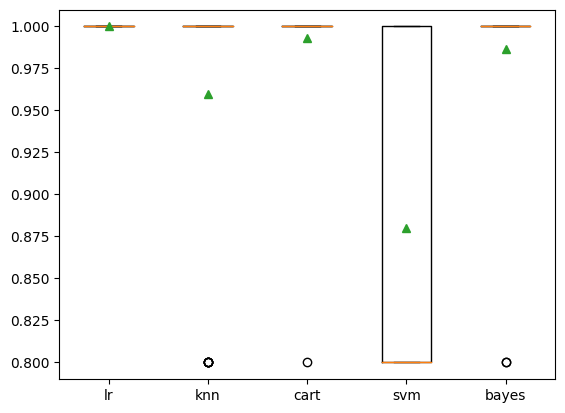

In [87]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, Y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

We can see that in this case, logistic regressiomn performs the best with about100 percent mean accuracy.

Here we have five different algorithms that perform well, presumably in different ways on this dataset.
Next, we can try to combine these five models into a single ensemble model using stacking.
We can use a logistic regression model to learn how to best combine the predictions from each of the separate five models.
The get_stacking() function below defines the StackingClassifier model by first defining a list of tuples for the five base models, then defining the logistic regression meta-model to combine the predictions from the base models using 5-fold cross-validation.

In [88]:
def get_stacking():
 # define the base models
 level0 = list()
 level0.append(('lr', LogisticRegression()))
 level0.append(('knn', KNeighborsClassifier()))
 level0.append(('cart', DecisionTreeClassifier()))
 level0.append(('svm', SVC()))
 level0.append(('bayes', GaussianNB()))
 # define meta learner model
 level1 = LogisticRegression()
 # define the stacking ensemble
 model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
 return model

We can include the stacking ensemble in the list of models to evaluate, along with the standalone models.

In [89]:
# get a list of models to evaluate
def get_models():
 models = dict()
 models['lr'] = LogisticRegression()
 models['knn'] = KNeighborsClassifier()
 models['cart'] = DecisionTreeClassifier()
 models['svm'] = SVC()
 models['bayes'] = GaussianNB()
 models['stacking'] = get_stacking()
 return models

Our expectation is that the stacking ensemble will perform better than any single base model.
This is not always the case and if it is not the case, then the base model should be used in favor of the ensemble model.
The complete example of evaluating the stacking ensemble model alongside the standalone models is listed below.

C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


>lr 1.000 (0.000)
>knn 0.960 (0.080)


C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\N

>cart 0.993 (0.036)
>svm 0.880 (0.098)
>bayes 0.987 (0.050)


C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\N

>stacking 0.980 (0.060)


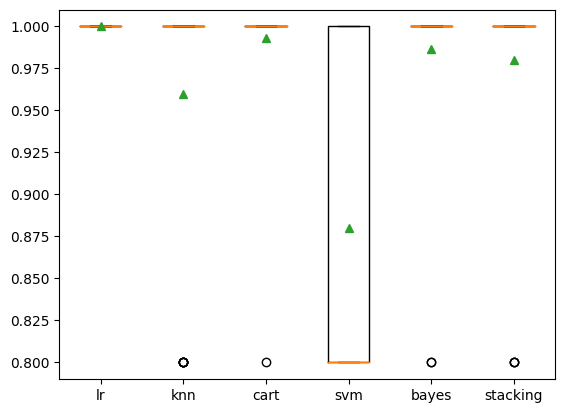

In [91]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, Y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, Y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Running the example first reports the performance of each model. This includes the performance of each base model, then the stacking ensemble.

# Regression Prediction Models

In this section, we will look at using stacking for a regression problem.
Next, we can evaluate a suite of different machine learning models on the dataset.
Specifically, we will evaluate the following three algorithms:

k-Nearest Neighbors
Decision Tree
Support Vector Regression

Each model will be evaluated using repeated k-fold cross-validation. The evaluate_model() function below takes a model instance and returns a list of scores from three repeats of 10-fold cross-validation.

We can then report the mean performance of each algorithm and also create a box and whisker plot to compare the distribution of accuracy scores for each algorithm.
In this case, model performance will be reported using the mean absolute error (MAE). The scikit-learn library inverts the sign on this error to make it maximizing, from -infinity to 0 for the best score.

>knn -0.057 (0.080)
>cart -0.027 (0.112)
>svm -0.177 (0.142)


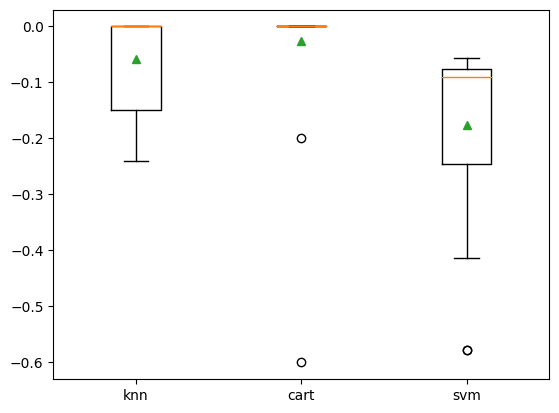

In [97]:
# get a list of models to evaluate
def get_models():
 models = dict()
 models['knn'] = KNeighborsRegressor()
 models['cart'] = DecisionTreeRegressor()
 models['svm'] = SVR()
 return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, Y):
 cv = RepeatedKFold(n_splits=10, n_repeats = 3, random_state = 1)
 scores = cross_val_score(model, X, Y, 
                          scoring = 'neg_mean_absolute_error', 
                          cv = cv, 
                          n_jobs = -1, 
                          error_score = 'raise')
 return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, Y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In the above plot, we can see that cart performs best with a a mean negative MAE score of -0.027

Next, we can try to combine these three models into a single ensemble model using stacking.
We can use a linear regression model to learn how to best combine the predictions from each of the separate three models.
The get_stacking() function below defines the StackingRegressor model by first defining a list of tuples for the three base models, then defining the linear regression meta-model to combine the predictions from the base models using 5-fold cross-validation.

In [98]:
# get a stacking ensemble of models
def get_stacking():
 # define the base models
 level0 = list()
 level0.append(('knn', KNeighborsRegressor()))
 level0.append(('cart', DecisionTreeRegressor()))
 level0.append(('svm', SVR()))
 # define meta learner model
 level1 = LinearRegression()
 # define the stacking ensemble
 model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
 return model

We can include the stacking ensemble in the list of models to evaluate, along with the standalone models.

In [99]:
def get_models():
 models = dict()
 models['knn'] = KNeighborsRegressor()
 models['cart'] = DecisionTreeRegressor()
 models['svm'] = SVR()
 models['stacking'] = get_stacking()
 return models

Our expectation is that the stacking ensemble will perform better than any single base model.

This is not always the case, and if it is not the case, then the base model should be used in favor of the ensemble model.

>knn -0.057 (0.080)
>cart 0.000 (0.000)
>svm -0.177 (0.142)
>stacking -0.194 (0.133)


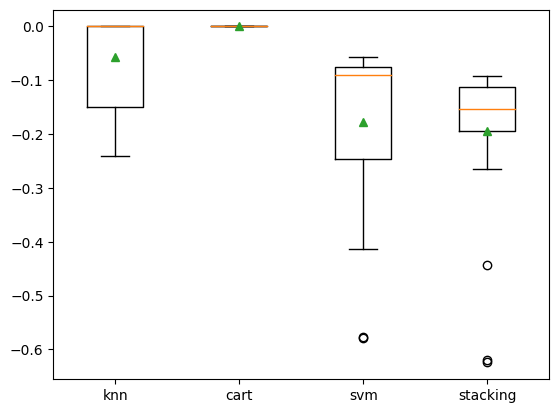

In [103]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, Y):
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, 
                          X, 
                          Y,
                          scoring = 'neg_mean_absolute_error',
                          cv = cv, 
                          n_jobs = -1,
                          error_score = 'raise')
 return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, Y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, 
               labels = names, 
               showmeans = True)
pyplot.show()

The above plot indicates that cart is the best performing, even better than the stacked model, with a negative mean absolute error of 0